# Neural Networks With Fashion MNIST

In this tutorial we are going to use a simple Neural Network to classify the Fashion MNIST dataset - which is a collection of different articles of clothing, taken from a catalog.

Before we get started we need to implement the following libraries:
1. Matplotlib -  Python 2D plotting library 
2. SKLearn - Simple and efficient tools for data mining and data analysis
3. Numpy  - Fundamental package for scientific computing with Python
4. Keras - Neural-network library 

In [1]:
# helper methods
from __future__ import print_function
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import metrics
from numpy import genfromtxt
import numpy as np
from keras.utils import to_categorical

# use keras to create a neural network
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.optimizers import SGD

%matplotlib inline

Using TensorFlow backend.


## Load the Numerical Data
We want to load the numerical representation of the images in Fashion MNIST. 

To Do: 
- Re-organise the data so the labels and images are separate
- Encode the labels

Fashion MNIST is a very large dataset, so we will use a smaller number of images so it's faster to see the model's results.

In [0]:
test_values = 1000
train_values = 2000
val_split = 0.125
train_split = 1 - val_split

In previous tutorial we have been using pandas .read_csv() function to load in our data. NumPy provides another way of doing this, using their genfromtxt() function - which can load data with missing values handled as specified.

Each line past the first skip_header lines is split at the delimiter character, and characters following the comments character are discarded.

In [0]:
# use NumPy's genfromtext to load data from the test csv and train csv
fashion_test_raw = genfromtxt('https://ai-camp-content.s3.amazonaws.com/fashion-mnist_test.csv', delimiter=',', skip_header=1, max_rows=test_values)
fashion_train_raw = genfromtxt('https://ai-camp-content.s3.amazonaws.com/fashion-mnist_train.csv', delimiter=',', skip_header=1, max_rows=train_values)

In [0]:
# create a helper function
def split_labels(labelled_data):
  # label is at start of each row
  # we want to remove labels and put them in a separate array
  data = []
  labels = []
  for row in labelled_data:
    labels.append(row[0])
    data.append(row[1:])
  return labels, data

In [0]:
# Separate the labels from the data
test_labels, test_flat = split_labels(fashion_test_raw)
train_labels, train_flat = split_labels(fashion_train_raw)

Keras has a function called **to_categorical(data-to-be-encoded)** which converts a class vector (integers) to binary class matrix. Try using this function for one hot encoding!

In [0]:
# One Hot Encoding - To do this you can use the keras to_categorical function and pass in the labels
test_hot_labels = to_categorical(test_labels)
train_hot_labels = to_categorical(train_labels)

In [0]:
# reshape data so it is 28x28 instead of 1x784
dimensions = (28,28)

reshape_helper = lambda image: np.reshape(image, dimensions)

# Use python list comprehension - this particular setup is equivalent to mapping a function to
# every element in a list
train = [reshape_helper(x) for x in train_flat]
test = [reshape_helper(x) for x in test_flat]

# Keras takes numpy arrays as input data, so convert our arrays to numpy arrays using the np.asarray() function
train_flat = np.asarray(train_flat)
test_flat = np.asarray(test_flat)

### Look at images in data

We have now loaded the images and their labels. Let's have a look at a small selection.


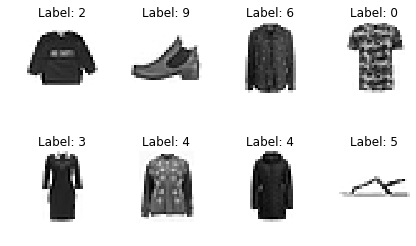

In [8]:
#iterates over the first 8 pictures in order in the list and print the image and label
pictures = list(zip(train_labels[:8], train[:8]))

for index, (label, image) in enumerate(pictures):
    plt.subplot(2, 4, index+1)
    plt.axis('off')
    plt.tight_layout()
    plt.imshow(image, cmap=plt.cm.gray_r)
    plt.title('Label: %i' % label)

## Define our Model
We now need to create the classifier that we will use and fit it to our data. 

<br>

For our model we want to use keras **Sequential model**, which is a linear stack of layers. To create it you can simply call Sequential() and layers can be added via the .add() function.

To Do:
- Define the model (Neural Network) 
- Specify which layers we are using, in which order

In [9]:
# Batch size is the number of samples to work through before updating the internal model parameters
# Define the batch size
batch_size = 32

# Create a Sequential model
model = Sequential()

#Adding layers to the model
# Input layer needs to know the dimensions of the input data
model.add(Dense(200, kernel_initializer='random_uniform', input_dim=(784)))
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.1))

#Add dense, activation and drop out once more
#add a dense layer
model.add(Dense(200))

#Add an activation of relu
model.add(Activation('relu'))

#Add dropout
model.add(Dropout(0.1))


model.add(Dense(10))

# Sigmoid is used because it forces values to be between 0 and 1 and we want to give
# a prediction between 0 and 1 for each class.
#Create an activation of 'sigmoid' like we did for 'relu' above
model.add(Activation('sigmoid'))


# Compile Configures the model for training, we want to pass in our SGD optimizer
# We also want to set up the loss function as categorical_crossentropy
# And the metrics that we want evaluated by the model during training and testing is accuracy
model.compile(SGD(lr=0.0001, momentum=0.9), 
                      loss='categorical_crossentropy', 
                      metrics=['accuracy'])

W0821 09:22:51.410641 139946438211456 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0821 09:22:51.447844 139946438211456 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0821 09:22:51.453727 139946438211456 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0821 09:22:51.469399 139946438211456 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0821 09:22:51.477741 

## Train & Evaluate our Model

Next we will use our dataset to train the model, then evaluate it

- Train the model
- Predict the labels for the test data
- Find out how accurate our model was 

In [10]:
# To train the model we use the .fit() function
# For traing we need to pass in the training data, the encoded training labels
# steps_per_epoch should always equal the number of samples divided by the batch size
# An epoch is defined as a single pass through your entire training set while training a machine learning model.
model.fit(
        train_flat,
        train_hot_labels,
        steps_per_epoch= int(train_values * train_split // batch_size),
        epochs=20,
        validation_split = val_split,
        validation_steps= int(train_values * val_split // batch_size)
)

W0821 09:22:51.690317 139946438211456 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 1750 samples, validate on 250 samples
Epoch 1/20
54/54 [==============================] - 4s 75ms/step - loss: 3.3571 - acc: 0.1212 - val_loss: 2.2436 - val_acc: 0.1000
Epoch 2/20
54/54 [==============================] - 0s 7ms/step - loss: 2.2185 - acc: 0.1148 - val_loss: 2.1462 - val_acc: 0.0960
Epoch 3/20
54/54 [==============================] - 0s 6ms/step - loss: 2.1536 - acc: 0.1143 - val_loss: 2.0941 - val_acc: 0.1000
Epoch 4/20
54/54 [==============================] - 0s 7ms/step - loss: 2.0809 - acc: 0.1158 - val_loss: 1.9658 - val_acc: 0.1000
Epoch 5/20
54/54 [==============================] - 0s 6ms/step - loss: 2.0003 - acc: 0.1186 - val_loss: 1.9133 - val_acc: 0.1000
Epoch 6/20
54/54 [==============================] - 0s 6ms/step - loss: 1.9417 - acc: 0.1231 - val_loss: 1.8572 - val_acc: 0.1080
Epoch 7/20
54/54 [==============================] - 0s 6ms/step - loss: 1.8717 - acc: 0.1284 - val_loss: 1.7687 - val_acc: 0.1080
Epoch 8/20
54/54 [========================

In [52]:
# Get model to predict labels on the test data
#To do this you can use the .predict_classes() functiona and pass in the test data
predicted = model.predict_classes(test_flat)


#You will then want to set you expected values to be the test labels
expected = test_labels

NN_accuracy = metrics.accuracy_score(expected, predicted)

#Now display the accuracy score and the confusion matrix
print('The confusion matrix is \n%s' % metrics.confusion_matrix(expected, predicted))

print('\n The accuracy is \n%s' % NN_accuracy)

The confusion matrix is 
[[ 81   0   5   4   0   0   6   0   2   0]
 [  0  87   1   1   0   0   0   0   0   0]
 [ 10   0  94   1   5   0   1   0   0   0]
 [ 22  17   0  61   4   0   0   0   0   0]
 [  1   0  77  12   5   0   1   0   0   0]
 [  0   0   0   2   0  91   0   1   3   0]
 [ 26   1  53   3   7   0   5   0   5   0]
 [  0   0   0   0   0  99   0   2   1   0]
 [  4   0   5   0   3  37   2   4  43   0]
 [  1   0   0   0   0 104   0   0   0   0]]

 The accuracy is 
0.469


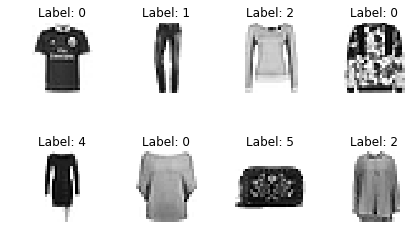

In [12]:
# #iterate over the first 8 pictures in order in the list and print the image and the predicted label
pictures = list(zip(predicted[:8], test[:8]))

for index, (label, image) in enumerate(pictures):
    plt.subplot(2, 4, index+1)
    plt.axis('off')
    plt.tight_layout()
    plt.imshow(image, cmap=plt.cm.gray_r)
    plt.title('Label: %i' % label)

## Exercises

1. Use the array of predicted labels and the array of real labels to manually calculate the average

In [47]:
#EXERCISE - use the two arrays to manually calculate the average 
# STEPS : 
# create variable for amount you got correct
# create a for loop from 0 to expected length
# if expected = predicted add 1 to correct variable 
# calculate accuracy 
correct = 0

for ii in range(len(predicted)):
  if expected[ii] == predicted[ii]:
    correct += 1
    
print('The amount of correct images is %s' % correct, 'out of %i' % len(expected))

The amount of correct images is 469 out of 1000


2. Train the K Nearest Neighbours classifier on the flat image data and predict the labels for the same test data. Use `KNeighborsClassifier` from the `sklearn.neighbors` package.

In [0]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()

#Train the model
classifier.fit(train_flat, train_labels)

#Generate predictions
predict = classifier.predict(test_flat)


3. Compare the two algorithms in terms of accuracy (you don't have to calculate this manually).

In [58]:
KNN_accuracy = metrics.accuracy_score(test_labels, predict)

print('KNN Accuracy: \n%s'
      % KNN_accuracy)

print('Neural Network Accuracy: \n%s'
     % NN_accuracy)



KNN Accuracy: 
0.795
Neural Network Accuracy: 
0.469


4. Show some of the images along with the predictions that belong to them

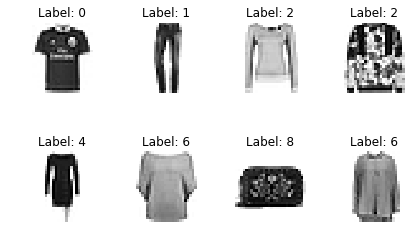

In [59]:
pictures = list(zip(predict[:8], test[:8]))

for index, (label, image) in enumerate(pictures):
    plt.subplot(2, 4, index+1)
    plt.axis('off')
    plt.tight_layout()
    plt.imshow(image, cmap=plt.cm.gray_r)
    plt.title('Label: %i' % label)